In [1]:
from sympy import *
init_printing(pretty_print=True,use_latex=True)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
f,t,T,G = symbols('f t T G')

In [3]:
f = G*t
print('f = ', f)

f =  G*t


C:\Users\alex\Miniconda3\envs\mdd\lib\site-packages\sympy\plotting\plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
C:\Users\alex\Miniconda3\envs\mdd\lib\site-packages\sympy\plotting\plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)


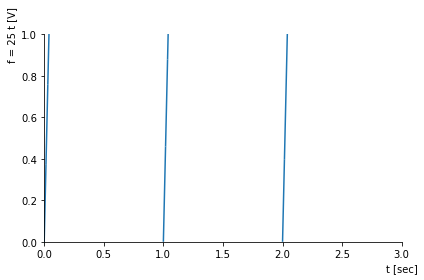

In [4]:
plot((f.subs(G,25),(t,0,1)),((f-25).subs(G,25),(t,1,2)),((f-50).subs(G,25),(t,2,3)), ylabel='f = 25 t [V]',xlabel='t [sec]',xlim = (0,3))

In [5]:
c0 = integrate(f,(t,0,T))*(1/T)
print(c0) 
print(c0.subs([(G,25),(T,1)]))

G*T/2
25/2


In [6]:
a1 = (2/T)*integrate(f*sin(2*pi*t),(t,0,T))

In [7]:
print(a1)
print(a1.subs([(T,1),(pi, 3.14),(G,25)]))

2*G*(-T*cos(2*pi*T)/(2*pi) + sin(2*pi*T)/(4*pi**2))/T
-7.96178343949045


In [8]:
a,b = [],[]
for n in range(10):
    a.append((2/T)*integrate(f*sin(n*pi*t),(t,0,T)))
    b.append((2/T)*integrate(f*cos(n*pi*t),(t,0,T)))

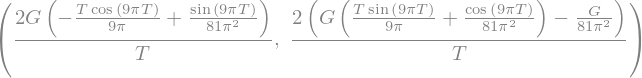

In [9]:
a[9], b[9]

In [10]:

c = []
for n in range(1,10):
    print(a[n])
    expr = (a[n]**2 + b[n]**2)
    expr = expr.subs([(T,1),(pi, 3.14),(G,25)])
    # print expr
    # val = lambdify(t,expr,'numpy')
    c.append(expr)

2*G*(-T*cos(pi*T)/pi + sin(pi*T)/pi**2)/T
2*G*(-T*cos(2*pi*T)/(2*pi) + sin(2*pi*T)/(4*pi**2))/T
2*G*(-T*cos(3*pi*T)/(3*pi) + sin(3*pi*T)/(9*pi**2))/T
2*G*(-T*cos(4*pi*T)/(4*pi) + sin(4*pi*T)/(16*pi**2))/T
2*G*(-T*cos(5*pi*T)/(5*pi) + sin(5*pi*T)/(25*pi**2))/T
2*G*(-T*cos(6*pi*T)/(6*pi) + sin(6*pi*T)/(36*pi**2))/T
2*G*(-T*cos(7*pi*T)/(7*pi) + sin(7*pi*T)/(49*pi**2))/T
2*G*(-T*cos(8*pi*T)/(8*pi) + sin(8*pi*T)/(64*pi**2))/T
2*G*(-T*cos(9*pi*T)/(9*pi) + sin(9*pi*T)/(81*pi**2))/T


Text(0, 0.5, 'Fourier coefficients $a_n^2 + b_n^2$')

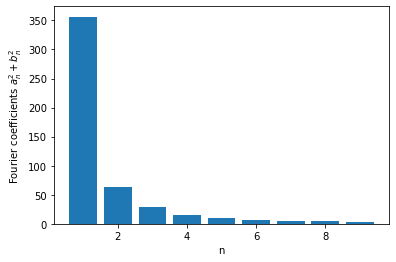

In [11]:
plt.figure()
plt.bar(range(1,10),c)
plt.xlabel('n')
plt.ylabel('Fourier coefficients $a_n^2 + b_n^2$')